# <font face="times"><font size="6pt"><p style = 'text-align: center;'> BRYN MAWR COLLEGE

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Computational Methods in the Physical Sciences</b><br/><br/>

<p style = 'text-align: center;'><b>Module 11:  Partial Differential Equations</b><br/><br/> 

***Prerequisite modules***: Module 3 -- Iterative Methods, Module 4 -- Differentiation, Module 10 -- Ordinary Differntial Equations 

***Estimated completion time***: 2-4 hours  

***Learning objectives***: Become familiar with some common techniques for solving partial differential equations

<img src = './Images/chaos-jurassic_xkcd.png' height=10>

<center>(Image credit: https://xkcd.com/1399)</center>

Partial differential equations (PDEs) arise often in physics; examples include the 3-D Schrodinger equation, Maxwell's equations and the equations of electrostatics, the 3-D wave equation, the diffusion equation, and the equations of fluid mechanics.  This module presents some basic methods used to solve these partial differential equations.$^1$

### <font color="blue">Scientist Profile</font>

**Rear Admiral Grace Hopper** of the US Navy was born in New York City in 1906 and is known as the "Queen of Code" and the "Mother of Computing."  She earned her Bachelors degree in Mathematics and Physics from Vassar College in 1928, and won a fellowship for further study, obtaining a Masters in Mathematics from Yale University in 1930.  In 1934 she earned a PhD in Mathematics from Yale, while also teaching the subject at Vassar.  She took a leave of absence from Vassar in 1943, during World War II, to convince the Navy to accept her despite their reticence due to her small size and secure teaching position.  Hopper was assigned to work on the Mark I at Harvard University, a giant computing machine 51' x 8' x 8' in size.  In 1952 she created the first compiler.  Later, she pushed for the development of a programming language similar to English; her efforts led to the creation of the COBOL programming language, designed for business applications.  Most famously, she invented the word "debugging" after she discovered a moth trapped in an actual computer and causing an error.  She retired and was recalled to duty twice in the 1960's and 1970's before eventually retiring in 1986.  After her retirement she was hired as a senior consultant to Digital Equipment Corporation, a position she held until her death in 1992.  Some of the honors she received include the Computer Science Man of The Year award, the Defense Distinguished Service Medal, and the National Medal of Technology.  The annual Grace Murray Hopper Award for Outstanding Young Computer Professionals was established in her honor in 1971.

<img src = './Images/Grace_Hopper.jpg' height=6>

<center>(Image credit: U.S. Navy via Wikipedia, http://defenseimagery.mil/imagery.html#guid=f1a07fc90bc516cbf2426f45f804117be1c69d73)</center>

## <font color="blue">11.1  Partial Differential Equations</font>

The previous module explored the solution of differential equations of one variable, but most equations of interest in physics are partial differential equations involving multiple variables; e.g., the equations mentioned in the introduction above.  These equations generally involve fields or functions as the dynamical objects, and they again can be categorized as initial value problems (e.g., the Schrodinger and wave equations) or boundary value problems (e.g., the Laplace and Poisson equations).  We first consider boundary value problems, and then initial value problems.

### <font color="blue">11.1.1  Boundary Value Problems</font>

A key approach to numerically solving partial differential equations, including those associated with boundary value (BV) problems, is the ***finite difference method*** (FDM).  As an example problem, consider for simplicity a 2-D situation in which the (constant) electric potential $\phi$ is specified everywhere on the boundary of a region, and we seek the potential in the interior of the region.  (The extension from 2-D to 3-D is straightforward; however, working in 2-D simplifies the discussion and the code.)  In this case, we need to solve Laplace's equation:

\begin{equation}
\dfrac{\partial^2 \phi}{\partial x^2} + \dfrac{\partial^2 \phi}{\partial y^2} = 0.
\end{equation}

The FDM works by populating the region of interest with a grid of discrete points.  The optimal shape of the grid will depend on the region of interest and the geometry of the problem.  In this example, we'll take the region of interest to be rectangular, and we'll use a simple grid of regularly spaced points (separated by distance $a$) that lie both on the boundary where $\phi$ is specified and in the interior region where we want to compute $\phi$.  

As we saw in Module 4, second derivatives can be approximated using a finite difference approach, for example

\begin{equation}
\dfrac{\partial^2 \phi(x,y)}{\partial x^2} = \dfrac{\phi(x+a,y) - 2\phi(x,y) + \phi(x-a,y)}{a^2}.
\end{equation}

This expression involves $\phi$ evaluated at three adjacent gridpoints.  A similar expression holds for the second partial derivative with respect to $y$:

\begin{equation}
\dfrac{\partial^2 \phi(x,y)}{\partial y^2} = \dfrac{\phi(x,y+a) - 2\phi(x,y) + \phi(x,y-a) }{a^2}.
\end{equation}

Combining these two expressions, we obtain the 2-D Laplacian of $\phi(x,y)$:

\begin{equation}
\dfrac{\partial^2 \phi}{\partial x^2} + \dfrac{\partial^2 \phi}{\partial y^2} = \dfrac{\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) - 4\phi(x,y)}{a^2}.
\end{equation}

Note that this expression for the Laplacian of $\phi$ at the point $(x,y)$ involves evaluating $\phi$ not only at that point, but also at all four of the nearest surrounding grid points $(x \pm a, y)$, $(x, y \pm a)$.  Setting the Laplacian equal to zero to obtain Laplace's equation yields

\begin{equation}
\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) - 4\phi(x,y) = 0.  
\end{equation}


To find $\phi$ throughout the region of interest requires solving this equation in a consistent way at every grid point in the region.  Note that this has transformed the task of solving a *differential* equation to one of solving a set of simultaneous linear *algebraic* equations, as we did in Module 6.  We could, therefore, use the methods of that module (e.g., Gaussian elimination or LU decomposition), but since the present equations are quite simple, we can use an easier (and, in this case, more efficient) technique, the ***relaxation method***.  The basic idea is to express the desired quantity as some function of itself, e.g. $\phi = f(\phi)$; one then plugs in guesses, or known initial or boundary values, on the right-hand side, and gets a new value out on the left-hand side.  The new value then is plugged in on the right.  This process is repeated until the output becomes equal to the input to within a specified accuracy. 

In the present scenario, the relaxation method can be carried out by rewriting the previous expression by moving the last term to the other side of the equation, dividing out the factor of 4, and renaming the $\phi(x,y)$ term to $\phi'(x,y)$:

\begin{equation}
\phi'(x,y) = \tfrac{1}{4} \left[ \phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) \right]  \hspace{4em} (1)
\end{equation}
 
We see that $\phi'$, the "new" value of $\phi$ at $(x,y)$, can be computed simply as the average of $\phi$ at the nearest-neighbor grid points.  Since we know the values of $\phi$ at the grid points located on the boundary of the region, we can provide those on the right-hand side and compute $\phi$ at adjacent points just inside the boundary.  We then substitute these new values on the right-hand side to get the values at points farther from the boundary.  This process is iterated until the values of $\phi$ at all of the grid points of interest have been determined and remain steady to within the desired accuracy.  Thus, the solution works its way inward from the boundary and repeats until the potentials at the grid points reach a steady state. 

This particular relaxation approach to solving the Laplace equation is known as the ***Jacobi method***, which can be proven to be ***numerically stable***; that is, the procedure will result in the calculation converging (settling down to steady results) rather than diverging (producing results that don't settle down).

Below is code to solve Laplace's equation for the case of a square region with a constant voltage `Vt` on the top of the square and another voltage `Vo` on the other sides, using  a square lattice of grid points, `N` per side of the square.  (It calls the `pylab` library to make a ***density plot*** of the computed voltage distribution, in which the voltage at each point is indicated by the shading there.)

In [3]:
def laplace_square(Vt, Vo, N):

    '''Use relaxation method to compute potential inside a square whose top is 
    at potential Vt and whose sides are at Vo, with N grid points per side.'''
    
    from numpy import empty, zeros, max
    from pylab import imshow, gray, show
    from copy import copy

    # Constants
    target = 1e-6    # target accuracy

    # Create arrays to hold potential values, and set boundary values
    phi = zeros([N+1, N+1], float)
    phi[0,:]  = Vt         # top side
    phi[-1,:] = Vo         # bottom side
    phi[:,0]  = Vo         # left side
    phi[:,-1] = Vo         # right side
    phiprime = copy(phi)   # holds "new" values

    # Main loop
    diff = 1.0
    while diff > target:
        # Calculate new values of the potential inside the boundary
        for i in range(1, N):
            for j in range(1, N):
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4

        # Calculate maximum difference from old values
        diff = max( abs(phi - phiprime) )

        # Copy the "new" values to the "old" array 
        phi = copy(phiprime)

    # Make a density plot
    imshow(phi)
    gray()
    show()
    
    return phi


There are several features to note about this code.  First, it isn't necessary to define the size of the square or the grid spacing $a$ --- the entire system, whatever its size, is represented by the set of elements in the matrices `phi` and `phiprime` that hold the "old" and "new" values of the potential.  The grid spacing and square size are implicit in the choice of `N` as the number of grid points per side.  Second, the boundary values are stored as the elements in the top and bottom rows, and first and last columns, of the `phi` and `phiprime` matrices; thus, the form of the matrices mimics that of the square itself.  Third, the `copy` function makes an *independent* matrix with the same initial values as `phi`.  The way Python works, writing `phiprime = phi` simply would give a second name to the original matrix `phi` such that changing either matrix would automatically change the other to be the same; we want to be able to set the values of the two matrices independently.  Fourth, at the end of the `while` loop the new data in `phiprime` is copied into `phi` in preparation for the next cycle.  

Finally, the reader should be warned that this code tends to take a long time to run: with $N$ grid points along each side, the square contains $(N - 2)^2$ interior grid points at which the potential must be updated, and the updating process generally must be repeated *many} times before the values converge.  (As an example, running with `Vt = 1.0`, `Vo = 0.0`, and `N = 100` required 10736 cycles and a run time of a few minutes to reach a target accuracy of $1.0 \times 10^{-6}$.)  Fortunately, it turns out that the Jacobi method can be made significantly faster with two simple changes.  

One change that allows the method to converge faster is to use ***overrelaxation***; essentially, the idea is to overshoot the next $\phi$ value by a bit in order to get to the final value in fewer steps.  In the basic Jacobi approach, we could write the new value of $\phi(x,y)$ in terms of the old value as

\begin{equation}
\phi'(x,y) = \phi(x,y) + \Delta \phi(x,y),
\end{equation}

where, clearly, $\Delta \phi(x,y) = \phi'(x,y) - \phi(x,y)$.  Overrelaxation involves computing a new $\phi_\beta$ as 

\begin{equation}
\phi_\beta (x,y) = \phi(x,y) + (1 + \beta) \, \Delta \phi(x,y),
\end{equation}
 
with $\beta > 0$.  If we substitute the  expression for $\Delta \phi(x,y)$, and $\phi'$ from Eq. (1), we obtain

\begin{align}
\phi_\beta (x,y) & = \phi(x,y) + (1 + \beta) \left[ \phi'(x,y) - \phi(x,y) \right]  \nonumber  \\
& = (1 + \beta) \, \phi'(x,y) - \beta \, \phi(x,y)  \nonumber  \\
& = \dfrac{1 + \beta}{4} \left[ \phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) \right] - \beta \, \phi(x,y).
\end{align}

An appropriate choice of $\beta$ will be discussed shortly, but first it must be noted that in order to be numerically stable the overrelaxation approach must be coupled with a second change to the code, known as the ***Gauss-Seidel method***.  This change is based on the observation that as the original relaxation code runs through the array of grid points row by row, when it comes to compute `phi[i,j]` the "new" values of two neighbors, `phi[i-1,j]` (above) and `phi[i,j-1]` (to the left), will have been computed already.  Assuming these "new" values are closer than the "old" ones are to the true values at those two grid points, it would make sense to use the new ones in the computation of `phi[i,j]`.  This change can be made very simply just by getting rid of the `phiprime` array and using a *single* array to store the $\phi$ values, so that "old" values are replaced by "new" values *as they're computed* rather than after all of the new values have been found (as was done with the `copy` function).  Since it stores one less array, this method has the additional benefit of needing less memory, which could be significant in the case of a grid with many points.

The Gauss-Seidel version of the previous equation is 

\begin{equation}
\phi (x,y) \leftarrow \dfrac{1 + \beta}{4} \left[ \phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) \right] - \beta \, \phi(x,y),
\end{equation}

where the "$\leftarrow$" corresponds to an equals sign in Python, and indicates that the value on the right replaces that on the left (using an equals sign wouldn't make sense mathematically since $\phi(x,y)$ appears on both sides).

Finally, it turns out that the computation using both the overrelaxation and Gauss-Seidel methods will be numerically stable only if $\beta < 1$.  Generally, convergence is faster for values of $\beta$ closer to 1, but some experimentation may be required to find the optimal value for a given problem.

It is important to mention that significantly faster solutions of some differential equations can be obtained by allowing the time steps to vary in size --- i.e., using an ***adaptive step size*** --- which becomes smaller where the function to be integrated changes more rapidly.  That approach will not be explored here, but the reader is encouraged to explore this technique elsewhere.

### <font color="blue">11.1.2  Initial Value Problems</font>

In the previous subsection we explored boundary value problems, in which constraining values were specified around a purely spatial region of interest---time played no fundamental role.

In the case of initial value problems, by contrast, both space and time play a key role, and we can think of the physical process being modeled as playing itself out in a "region" spanning both space and time.  In these problems, we generally do not have a complete set of conditions surrounding the "space-time" region of interest because we have conditions specified only at the beginning, not the end of the process.  As a consequence, the method of solution of IV problems is different from that for BV problems.  

An important example of an IV problem is provided by the (1-D) ***diffusion equation***,

\begin{equation}
\dfrac{\partial \phi (x,t)}{\partial t} = D \, \dfrac{\partial^2 \phi(x,t)}{\partial x^2},   \hspace{4em} (2)
\end{equation}  

which describes the diffusion of gases (in which case $\phi$ represents the number density of particles), and the dissipation of heat (in which case $\phi$ represents the temperature, and the equation is called the ***heat equation***); $D$ is the "diffusion constant" ("thermal diffusivity," in the heat equation).

If we again imagine a grid of points distributed along our (one-dimensional) space at equal intervals $a$, then the second-derivative on the right-hand side of Eq. (2) can be expressed in the way seen previously:

\begin{equation}
\dfrac{\partial \phi (x,t)}{\partial t} = \dfrac{D}{a^2} \left[ \phi(x+a, t) - 2\phi(x,t) + \phi(x-a, t) \right].  \hspace{4em} (3)
\end{equation}  

Thinking of the $\phi$ terms at different grid points as *different variables*, this equation represents a *set* of ordinary differential equations (one for each grid point $x$) that can be integrated with the methods discussed at the end of section 2 of Module 10.  It is common to use Euler's method [with accuracy O($h^2$)] rather than RK4 to perform the necessary integrations because the second-derivative approximation employed in Eq. (3) is only of O($h^2$), so using a more accurate (and slower) integration method would be pointless.

Recalling that for an equation of the form $\dfrac{d\phi}{dt} = f(\phi,t)$ Euler's method states that $\phi(t + h) \simeq \phi(t) + h f(\phi, t)$, Eq. (3) is integrated to give

\begin{equation}
\phi(x, t+h) \simeq \phi(x,t) + h\dfrac{D}{a^2} \left[ \phi(x+a, t) - 2\phi(x,t) + \phi(x-a, t) \right].  \hspace{4em} (4)
\end{equation}  

Assuming that $\phi$ is known at each grid point at time $t$, this equation can be used to find $\phi$ at $t + h$, by cycling through all of the grid points, updating their values using this expression.  The approach outlined here is called the ***forward-time centered-space***, or FTCS, method.

**Example #1**

As a simple physical example, consider a stainless steel rod (with circular cross-section) of length $L = 0.1$ m and  thermal diffusivity $D = 4.25 \times 10^{-6}$ m$^2$/s whose curved surface is perfectly insulated, but whose ends are exposed.  The rod starts out with a uniform temperature of 20$^{\circ}$C, and at time $t = 0$ its two ends are immersed in ideal thermal reservoirs at 0$^{\circ}$C and 50$^{\circ}$C on the left and right, respectively.  We will use a set of 101 grid points equally spaced along the rod (so there will be one exactly at the midpoint).  Our goal is to see how the temperature throughout the rod evolves over time, by taking "snapshots" at various moments.  

The code to apply the FTCS method to this problem is shown below.  After defining various constants, including the "snapshot" times (1.0 s, 5.0 s, 20.0 s, 50.0 s, and 250.0 s), the code initializes two arrays to store the temperatures at the grid points (array `T` stores the "old" values; `Tn` stores the "new" ones).  The loop implements the expression for updating $\phi$ shown in Eq. [4].  Plots are made when the time matches one of the snapshot times.  (Remember that to check if two `float` quantities are equal, one has to check whether their difference is less than some small value---even if exactly equal, they may not be stored that way in memory.  The small value used in the code is labeled `epsilon`).


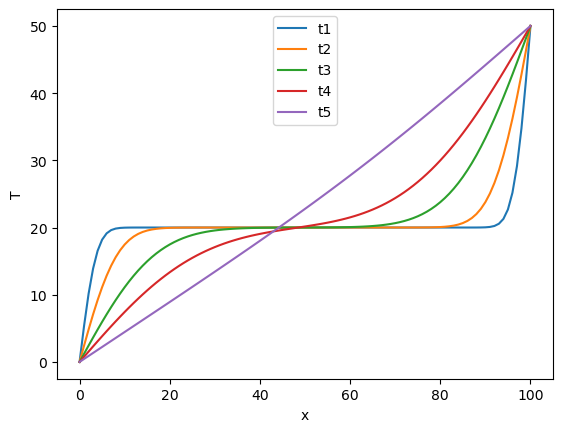

In [4]:
%matplotlib inline
from matplotlib.pyplot import plot, xlabel, ylabel, legend
from numpy import empty, abs

#Constants
L = 0.1       # Length of rod in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of grid *intervals*
a = L/N       # Grid spacing
h = 1e-3      # Time-step
epsilon = h/1000

Tl = 0.0     # Left-hand end temperature in Celsius
Tmid = 20.0  # Initial rod temperature in Celsius
Tr = 50.0    # Right-hand end temperature in Celsius

#Snapshot times
t1 = 1.0
t2 = 5.0
t3 = 20.0
t4 = 50.0
t5 = 250.0

#Arrays to store temperature
T = empty(N+1,float)   # "old" values
T[0] = Tl
T[N] = Tr
T[1:N] = Tmid

Tn = empty(N+1,float)  # "new" values
Tn[0] = Tl
Tn[N] = Tr

#Main loop
t = 0.0
c = h * D / (a*a)      # leading coefficient

while t < t5 + epsilon:
    # Calculate the new values of T
    for i in range(1,N):
        Tn[i] = T[i] + c * (T[i+1] - 2*T[i] + T[i-1])   # Eq. (15)
    
    T = Tn             # update temps
    t = t + h

    #Make plots at the snapshot times
    if abs(t-t1) < epsilon:
        plot(T,label='t1')
    if abs(t-t2) < epsilon:
        plot(T,label='t2')
    if abs(t-t3) < epsilon:
        plot(T,label='t3')
    if abs(t-t4) < epsilon:
        plot(T,label='t4')
    if abs(t-t5) < epsilon:
        plot(T,label='t5')

xlabel("x")
ylabel("T")
legend(loc=9)

This code, the heart of which is very simple, takes around 20 seconds to run on an older desktop computer.  [But replacing the `for` loop with a single line of vectorized code, `Tn[1:N] = T[1:N] + c*(T[0:N-1] - 2*T[1:N] + T[2:N+1])`, reduces the computation time by a factor of 4-5!]  It shows that the temperature profile approaches a linear one over time, as might be expected.

It's worth noting that the FTCS method can be used even when the boundary values change over time.  The array elements representing those values just need to be updated appropriately.


## <font color="blue">11.2  Other Methods</font>

For some IV problems of physical interest, e.g. the (1-D) wave equation describing the behavior of waves (that move at speed $v$) on a string,

\begin{equation}
\dfrac{\partial^2 \phi}{\partial x^2} - \dfrac{1}{v^2} \dfrac{\partial^2 \phi}{\partial t^2} = 0 ,  \hspace{4em} (5)
\end{equation}

the FTCS method is numerically unstable, and cannot be used.  One approach that does work is the ***Crank-Nicholson*** method, but it will not be explored here.  

A general approach for solving partial differential equations is the powerful ***finite element method*** (distinct from the finite *difference* methods discussed earlier).  This method is rather complicated, and beyond the scope of this course, but mechanical engineers and others who model physical structures tend to make heavy use of it.

Yet another method which, when applicable, gives better results than the finite difference or finite element approaches is called the ***spectral*** or ***Fourier transform method***.  As an example of its application, consider the wave equation above for a string of length $L$, with fixed ends at $x = 0$ and $x = L$.  A function that satisfies Eq. (5) subject to these boundary conditions is

\begin{equation}
\phi_k (x,t) = \sin\left( \dfrac{\pi k x}{L} \right) e^{i\omega t} ,
\end{equation}

if $k$ is an integer and the frequency obeys $\omega = (\pi k /L) v$.  (The actual physical motion would be represented by the real part of this function, which will be extracted at the end of the process.) 

Now imagine dividing the string into $N$ intervals bounded by $N + 1$ equally spaced grid points, including the two at the ends for which $\phi = 0$.  The positions of the grid points would be $x_n = (n/N) L$, and so the solutions at those points would have the values

\begin{equation}
\phi_k (x_n,t) = \sin\left( \dfrac{\pi k x_n}{L} \right) \exp\left( i \dfrac{\pi k v}{L} t \right) .
\end{equation}
 
Because the wave equation is linear, we can make a linear combination of these solutions for different $k$ values that also will satisfy the wave equation at $x_n$:

\begin{equation}
\phi (x_n,t) = \dfrac{1}{N} \sum_{k = 1}^{N - 1} c_k \sin \left( \dfrac{\pi k x_n}{L} \right) \exp\left( i \dfrac{\pi k v}{L} t \right) .   \hspace{4em} (6)
\end{equation}

Here, the coefficients $c_k$ may be complex, and the $1/N$ factor introduced in front is useful for future expressions.  The sum starts at $k = 1$ since the sine term vanishes for $k = 0$, and it includes $N - 1$ terms in total since that is the number of "free" grid points to be modeled (the endpoints are fixed). 

If the possibly-complex $c_k$ are written as $c_k = a_k + i b_k$, and we substitute $x_n = (n/N)L$, we obtain for the real part of the expression at time $t = 0$

\begin{equation}
\phi_R (x_n, 0) = \dfrac{1}{N} \sum_{k = 1}^{N - 1} a_k \sin \left( \dfrac{\pi k n}{N} \right) .  \hspace{4em} (7)
\end{equation}

Similarly, the real part of the time derivative of the expression in Eq. (6) at $t = 0$ is

\begin{equation}
\left. \dfrac{\partial \phi (x_n, 0)}{\partial t} \right|_R = -\left(\dfrac{\pi v}{L} \right)\dfrac{1}{N} \sum_{k = 1}^{N - 1} k \, b_k \sin \left( \dfrac{\pi k n}{N} \right) .   \hspace{4em} (8)
\end{equation}

<font color="green"><b>Breakpoint 1</b></font>: Derive this result.

Eqs. (7) and (8) allow us to match the initial position and velocity of each grid point by suitable choices of the  $a_k$ and $b_k$ values.  Once that's been done, those coefficients can be substituted into Eq. (6), which then will give the behavior of the grid points, and therefore the string, for *all* times.  

One great feature of this approach is that we can use the speedy FFT (actually, the fast discrete sine transform --- related in an obvious way to the fast discrete cosine transform) to compute the coefficients, and the full solution of Eq. (6) can be found using similar methods.  Additionally, we don't need to cycle through time steps to get the shape and motion of the string at a particular time; we simply evaluate Eq. (6) at that time.  We should note, though, that while the speed of the fast Fourier methods is O($N \log N$), that of FTCS is O($N$), so for some uses the latter approach will be faster.  On the other hand, while the FTCS can be numerically unstable, that problem does not plague the spectral method.  (It is, however, limited to situations in which the boundary conditions are simple, and the differential equation to be solved is linear.)

### <font color="blue">Recap</font>

* Problems involving partial differential equations fall into two categories: boundary value problems and initial value problems.
<br>

* Boundary value problems can be solved using the finite difference approach with relaxation, e.g. the Gauss-Seidel method (which uses *over}relaxation).  Initial value problems can be solved using the forward-time centered-space or Crank-Nicholson methods (as well as others).
<br>

* Other powerful techniques for solving partial differential equations are the finite element and Fourier transform methods. 

### <font color="blue">Exercises</font>

**<u>Exercise #1</u>**

Code presented in the Module uses the Jacobi relaxation method to determine the electric potential inside a square whose top side is maintained at potential `Vt` and whose other sides are held at `Vo`. } 

(a) Run the code with `Vt = 1.0` and `Vo = 0.0`, and time (with a watch or wall clock) how long it takes to execute.  (Note: it will be on the scale of minutes!) 

(b) Modify the code to implement overrelaxation and the Gauss-Seidel method.  Run and time it again with the parameters used in part (a).  How much faster does it run?  Check whether the arrays of `phi` returned by the two versions of the code agree.  (Remember the `allclose` function.) 

(c) Further modify the code from part (b) to find the potential inside a square whose left and right sides are held at potential $0$ and whose top and bottom sides are at $+V$ and $-V$, respectively.  Run it with $V = 2.0$  
<br>

**<u>Exercise #2</u>**

The evolution of a plucked string starting from its initial shape can be computed using spectral methods.  The function `pluck` below creates a triangle shape on a string of length $L$ pulled up at point $x_p$ by a distance $h$ from the rest position of the string. }
	
```python
def pluck(h, L, xp):
    '''Create `plucked string' shape with height h on
    string of length L, with pluck at xp.'''
	    
    from numpy import linspace, zeros, array, floor
	    
    N = 1001
    Np = int(floor(N * xp/L))
    x = linspace(0,L,N)
    y = zeros(len(x), float)
	    
    for i in range(Np):
        y[i] = h * i/Np
    for i in range(Np,N):
        y[i] = h * (1 - (i-Np)/(N-Np-1))
	    
    plot(x,y)
    ylim([0,L])
    title("Initial String Shape")
	    
    return array(y, float)
```
	    
(a) Use `pluck` to create a pluck of height $h = 0.1$ at position $x_p = 0.4$ on a string of length $L = 1.2$, and store the output in a variable. 

(b) Copy the notebook `Newmans_DFTs.ipynb` from the Supplements folder to your directory and make it available in your notebook (remember: that's done using `%run [notebook name]`).  Run the function `dst` from that notebook, which implements the discrete sine transform, on the output from the `pluck` function.  (It needs just the name of that output as its only input.) 
	
(c) Write a function that takes the coefficients it outputs and uses them in the spectral method to produce the shape of the string at any time $t$ later, for any wave speed $v$.  (d) Plot the string shape at $14$ equally spaced time points from $t = 0$ to $t = 10.0$, assuming a wave speed $v = 3.0$. 


### <font color="blue">Breakpoint Answers</font>

**Breakpoint 1**:

Take the derivative of Eq. (6)

\begin{align*}
\dfrac{d}{dt} \phi (x_n,t) & =  \dfrac{1}{N} \sum_{k = 1}^{N - 1} (a_k + ib_k) \sin \left( \dfrac{\pi k x_n}{L} \right) i \dfrac{\pi kv}{L} \exp\left( i \dfrac{\pi k v}{L} t \right)  \\
& = \dfrac{1}{N} \sum_{k = 1}^{N - 1} (a_k + ib_k) \sin \left( \dfrac{\pi k x_n}{L} \right) i \dfrac{\pi kv}{L} \left[ \cos\left( \dfrac{\pi k v}{L} t \right) + i \sin\left( \dfrac{\pi k v}{L} t \right) \right] ;
\end{align*}  

take the real part 

\begin{align*}
\left. \dfrac{d}{dt} \phi (x_n,t) \right|_R & = \left\{ \dfrac{1}{N} \sum_{k = 1}^{N - 1} \sin \left( \dfrac{\pi k x_n}{L} \right) \dfrac{\pi kv}{L} (i a_k - b_k) \left[ \cos\left( \dfrac{\pi k v}{L} t \right) + i \sin\left( \dfrac{\pi k v}{L} t \right) \right] \right\}_R  \\
& = \dfrac{1}{N} \sum_{k = 1}^{N - 1} \sin \left( \dfrac{\pi k x_n}{L} \right) \dfrac{\pi kv}{L} \left[ - b_k \cos\left( \dfrac{\pi k v}{L} t \right) - a_k \sin\left( \dfrac{\pi k v}{L} t \right) \right]  ;
\end{align*}

and set $t = 0$

\begin{equation*}
\left. \dfrac{d}{dt} \phi (x_n,t) \right|_R = - \dfrac{\pi v}{L}  \dfrac{1}{N} \sum_{k = 1}^{N - 1} k \, b_k \sin \left( \dfrac{\pi k x_n}{L} \right) = - \dfrac{\pi v}{L}  \dfrac{1}{N} \sum_{k = 1}^{N - 1} k \, b_k \sin \left( \dfrac{\pi k n}{N} \right) . 
\end{equation*}

This is the claimed result.
The cosine sum starts with $k = 0$ because cos(0) is not zero.  However, $\sin(0) = 0$, so there is no point in including the $k = 0$ term in that sum.


### <font color="blue">References</font>

$^1$ Module adapted from *Computational Physics* by M. Newman.
